# ПРОГНОЗИРОВАНИЕ КОЛИЧЕСТВА ПРОДАННЫХ В МЕСЯЦ №1

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpr8lgqu9c
  JVM stdout: /tmp/tmpr8lgqu9c/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpr8lgqu9c/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,1 month and 27 days
H2O_cluster_name:,H2O_from_python_unknownUser_1zj3at
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:
#file = '/content/drive/MyDrive/Colab Notebooks/Diplom/df4eda2clean2.csv'
file = 'df2prep4regressionV2.csv'
df = h2o.import_file(file)
df = df.drop('C1')
#df = df.drop('Revenue_T')
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Zip,Units,Revenue_T,Manufacturer,MonthNo,CategoryInSegmentInCompete
6111,12,31676.4,Natura,12,UrbanConvenienceNotCompete
92879,7,11020.6,Pirum,12,RuralProductivityNotCompete
32901,3,35010.4,VanArsdel,12,UrbanModerationIsCompete
84770,3,16441.1,Currus,12,RuralSelectNotCompete
95380,3,35541.4,Abbas,12,UrbanModerationIsCompete
14559,2,2518.74,Natura,12,YouthYouthNotCompete
16301,2,2518.74,Natura,12,YouthYouthNotCompete
48439,2,9070.74,Quibus,12,RuralSelectNotCompete
21787,2,28348.7,VanArsdel,12,UrbanModerationIsCompete
7503,2,9058.14,Currus,12,MixAll SeasonNotCompete


In [3]:
train, valid, unseen = df.split_frame(ratios=[0.7, 0.15])

In [4]:
train

Zip,Units,Revenue_T,Manufacturer,MonthNo,CategoryInSegmentInCompete
32901,3,35010.4,VanArsdel,12,UrbanModerationIsCompete
84770,3,16441.1,Currus,12,RuralSelectNotCompete
95380,3,35541.4,Abbas,12,UrbanModerationIsCompete
14559,2,2518.74,Natura,12,YouthYouthNotCompete
48439,2,9070.74,Quibus,12,RuralSelectNotCompete
21787,2,28348.7,VanArsdel,12,UrbanModerationIsCompete
7503,2,9058.14,Currus,12,MixAll SeasonNotCompete
33126,2,26458.7,Natura,12,UrbanModerationIsCompete
6450,1,15113.7,Natura,12,UrbanModerationIsCompete
32164,1,14615.4,Natura,12,UrbanModerationIsCompete


In [5]:
valid

Zip,Units,Revenue_T,Manufacturer,MonthNo,CategoryInSegmentInCompete
92879,7,11020.6,Pirum,12,RuralProductivityNotCompete
70578,1,6708.87,VanArsdel,12,UrbanConvenienceNotCompete
15955,1,9002.7,Aliqui,12,UrbanExtremeNotCompete
6790,1,9002.7,Aliqui,12,UrbanExtremeNotCompete
75287,1,12851.4,VanArsdel,12,UrbanModerationIsCompete
56097,1,12851.4,VanArsdel,12,UrbanModerationIsCompete
70506,1,12851.4,VanArsdel,12,UrbanModerationIsCompete
30534,1,12851.4,VanArsdel,12,UrbanModerationIsCompete
78226,1,12851.4,VanArsdel,12,UrbanModerationIsCompete
30559,1,7307.37,Currus,12,UrbanExtremeNotCompete


In [6]:
unseen

Zip,Units,Revenue_T,Manufacturer,MonthNo,CategoryInSegmentInCompete
6111,12,31676.4,Natura,12,UrbanConvenienceNotCompete
16301,2,2518.74,Natura,12,YouthYouthNotCompete
60073,2,10382.4,Natura,12,UrbanConvenienceNotCompete
30901,1,7238.7,Natura,12,UrbanExtremeNotCompete
44811,1,7238.7,Natura,12,UrbanExtremeNotCompete
16412,1,6986.7,Aliqui,12,UrbanExtremeNotCompete
78947,1,12851.4,VanArsdel,12,UrbanModerationIsCompete
32713,1,12851.4,VanArsdel,12,UrbanModerationIsCompete
25312,1,7307.37,Currus,12,UrbanExtremeNotCompete
51041,1,16316.4,VanArsdel,12,UrbanModerationIsCompete


In [7]:
y = "Units"
x=train.columns
x.remove(y)

# Тренировка модели

In [8]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y,  training_frame = train, validation_frame = valid)

AutoML progress: |
17:06:20.901: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [9]:
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230921_170620,0.154372,0.0238309,0.0210058,0.0347058,0.0238309
StackedEnsemble_BestOfFamily_1_AutoML_1_20230921_170620,0.155289,0.0241146,0.021486,0.0349499,0.0241146
XGBoost_1_AutoML_1_20230921_170620,0.157207,0.024714,0.0210369,0.0344298,0.024714
XGBoost_2_AutoML_1_20230921_170620,0.163231,0.0266442,0.0222762,0.0382382,0.0266442
GBM_4_AutoML_1_20230921_170620,0.164393,0.027025,0.0257972,0.0425727,0.027025
XGBoost_3_AutoML_1_20230921_170620,0.168077,0.0282498,0.0261439,0.0413939,0.0282498
GBM_3_AutoML_1_20230921_170620,0.170486,0.0290655,0.0282295,0.0455324,0.0290655
GBM_2_AutoML_1_20230921_170620,0.172081,0.029612,0.0296949,0.0470076,0.029612
GBM_1_AutoML_1_20230921_170620,0.172762,0.0298465,0.0257799,0.0398313,0.0298465
DRF_1_AutoML_1_20230921_170620,0.204563,0.0418462,0.0354252,0.051702,0.0418462


In [10]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20230921_170620',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20230921_170620',
 'XGBoost_1_AutoML_1_20230921_170620',
 'XGBoost_2_AutoML_1_20230921_170620',
 'GBM_4_AutoML_1_20230921_170620',
 'XGBoost_3_AutoML_1_20230921_170620',
 'GBM_3_AutoML_1_20230921_170620',
 'GBM_2_AutoML_1_20230921_170620',
 'GBM_1_AutoML_1_20230921_170620',
 'DRF_1_AutoML_1_20230921_170620',
 'XRT_1_AutoML_1_20230921_170620',
 'GLM_1_AutoML_1_20230921_170620']

In [11]:
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
se

key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [12]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.8/dist-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [13]:
metalearner.coef_norm()

{'Intercept': 1.0272323833298929,
 'XGBoost_1_AutoML_1_20230921_170620': 0.1424551478900314,
 'XGBoost_2_AutoML_1_20230921_170620': 0.04507757041452286,
 'GBM_4_AutoML_1_20230921_170620': 0.021673027812489476,
 'XGBoost_3_AutoML_1_20230921_170620': 0.024724834797380347,
 'GBM_3_AutoML_1_20230921_170620': 2.0867579074970944e-06,
 'GBM_2_AutoML_1_20230921_170620': 0.0,
 'GBM_1_AutoML_1_20230921_170620': 0.049659161765192646,
 'DRF_1_AutoML_1_20230921_170620': 0.0,
 'XRT_1_AutoML_1_20230921_170620': 0.0,
 'GLM_1_AutoML_1_20230921_170620': 0.0}

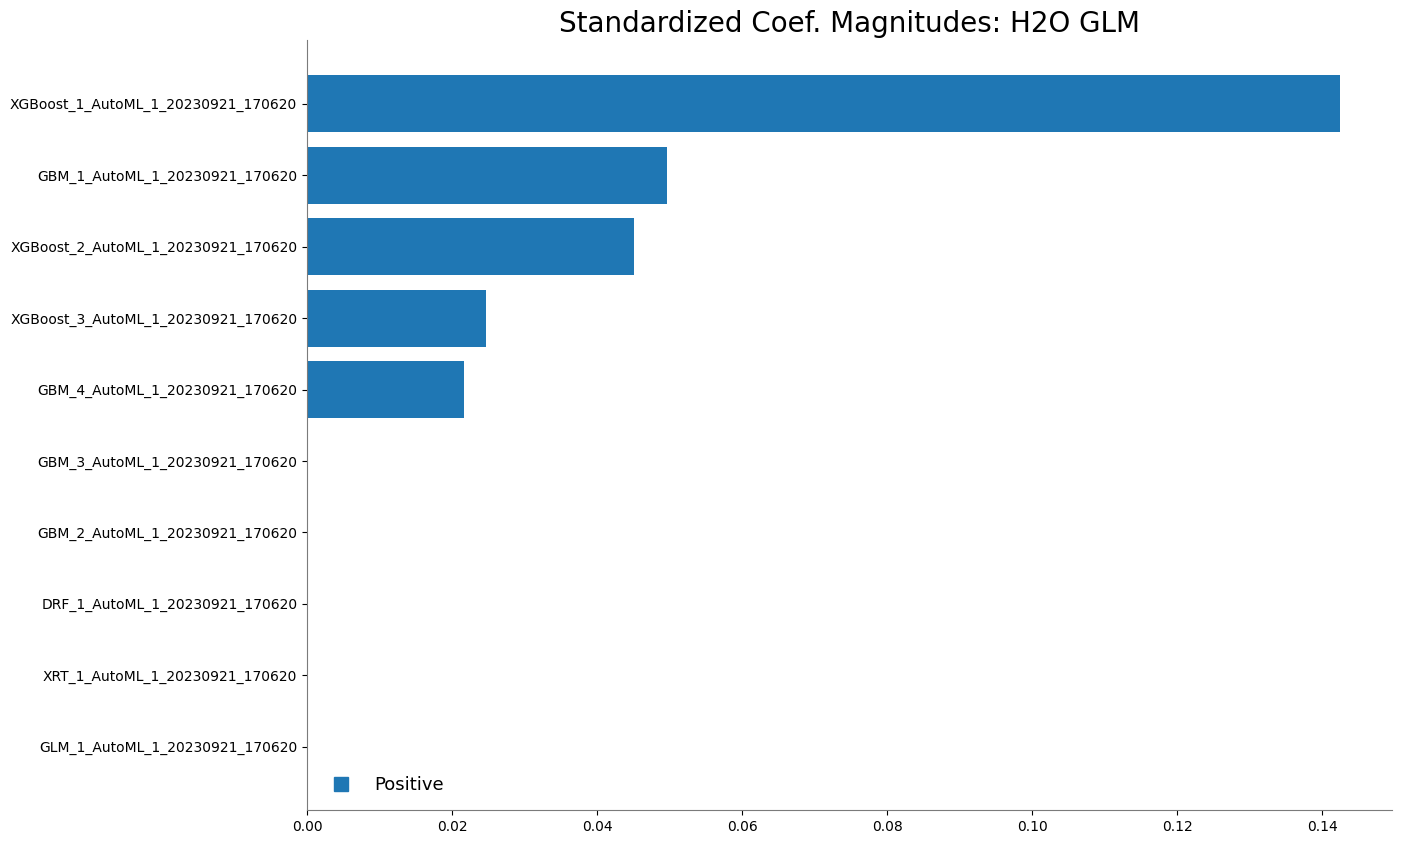

In [14]:
%matplotlib inline
metalearner.std_coef_plot()

# Что с важностью признаков

Model ID: StackedEnsemble_AllModels_1_AutoML_1_20230921_170620
StackedEnsemble_AllModels_1_AutoML_1_20230921_170620 - ERROR PLOTTING
Model ID: StackedEnsemble_BestOfFamily_1_AutoML_1_20230921_170620
StackedEnsemble_BestOfFamily_1_AutoML_1_20230921_170620 - ERROR PLOTTING
Model ID: XGBoost_1_AutoML_1_20230921_170620


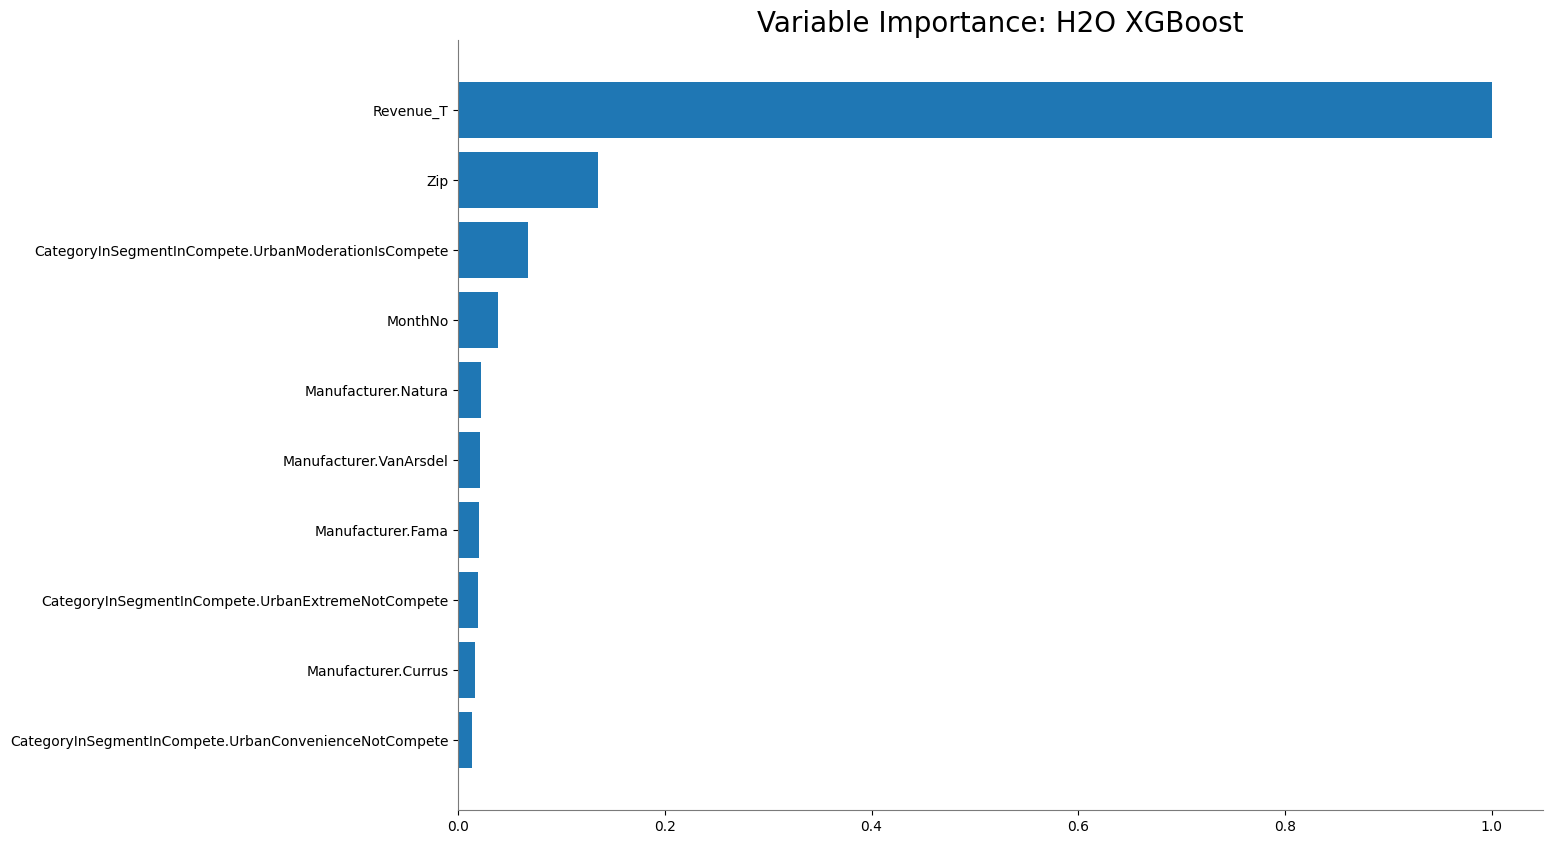

Model ID: XGBoost_2_AutoML_1_20230921_170620


<Figure size 640x480 with 0 Axes>

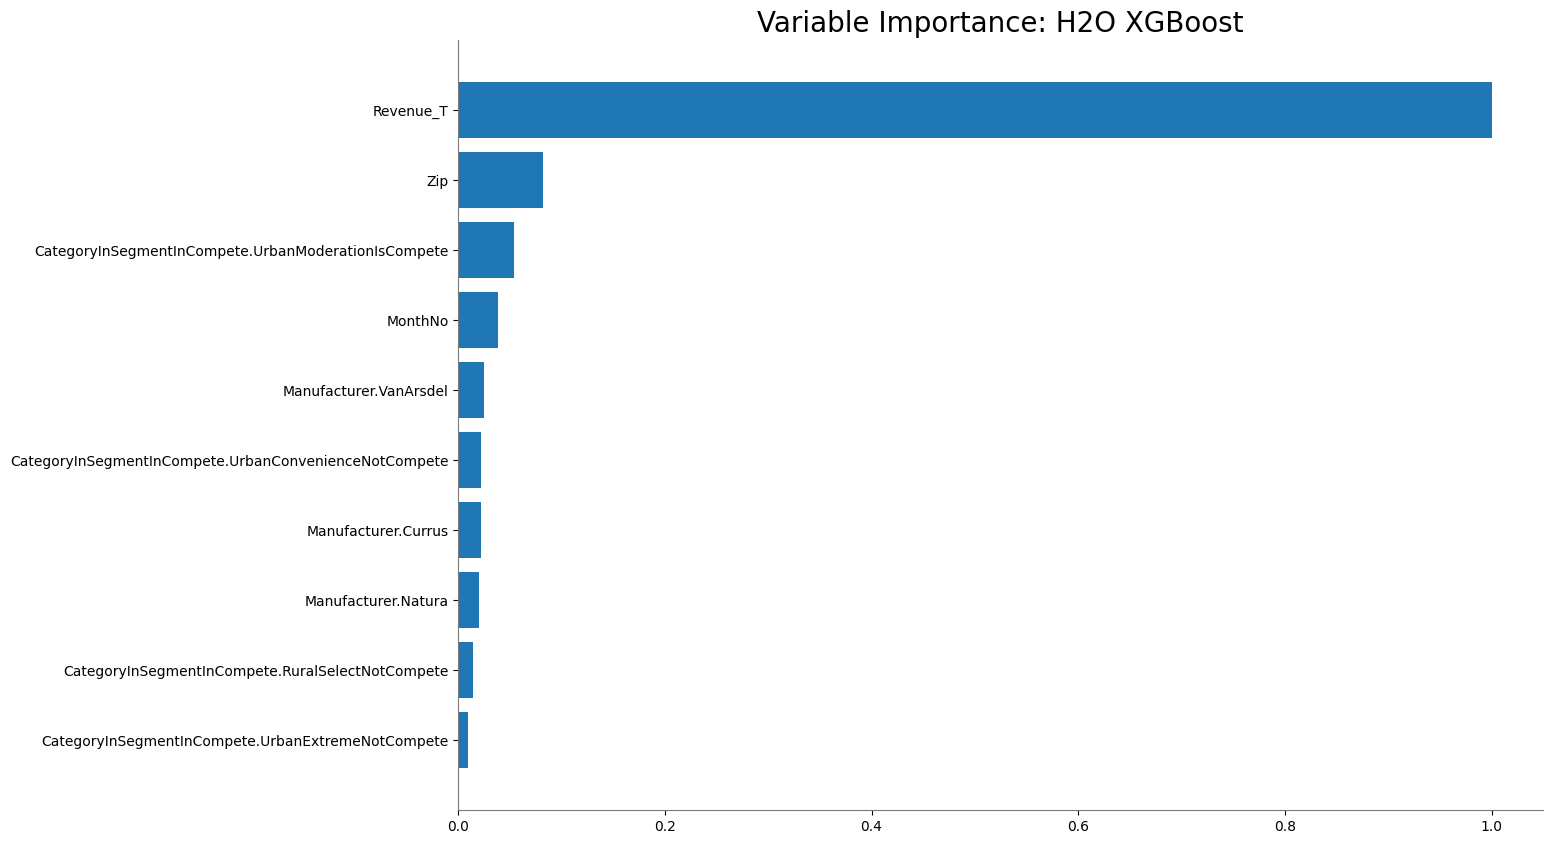

Model ID: GBM_4_AutoML_1_20230921_170620


<Figure size 640x480 with 0 Axes>

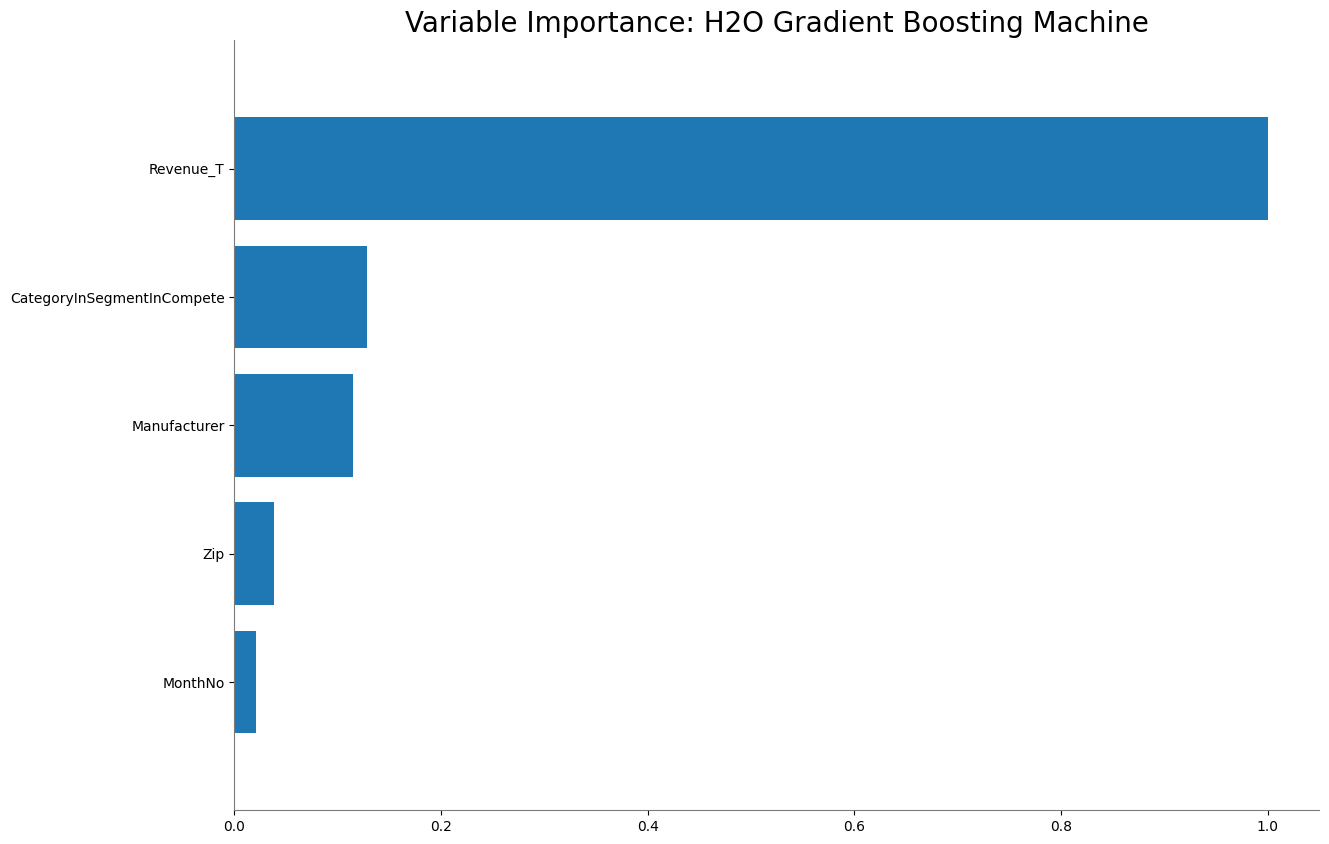

Model ID: XGBoost_3_AutoML_1_20230921_170620


<Figure size 640x480 with 0 Axes>

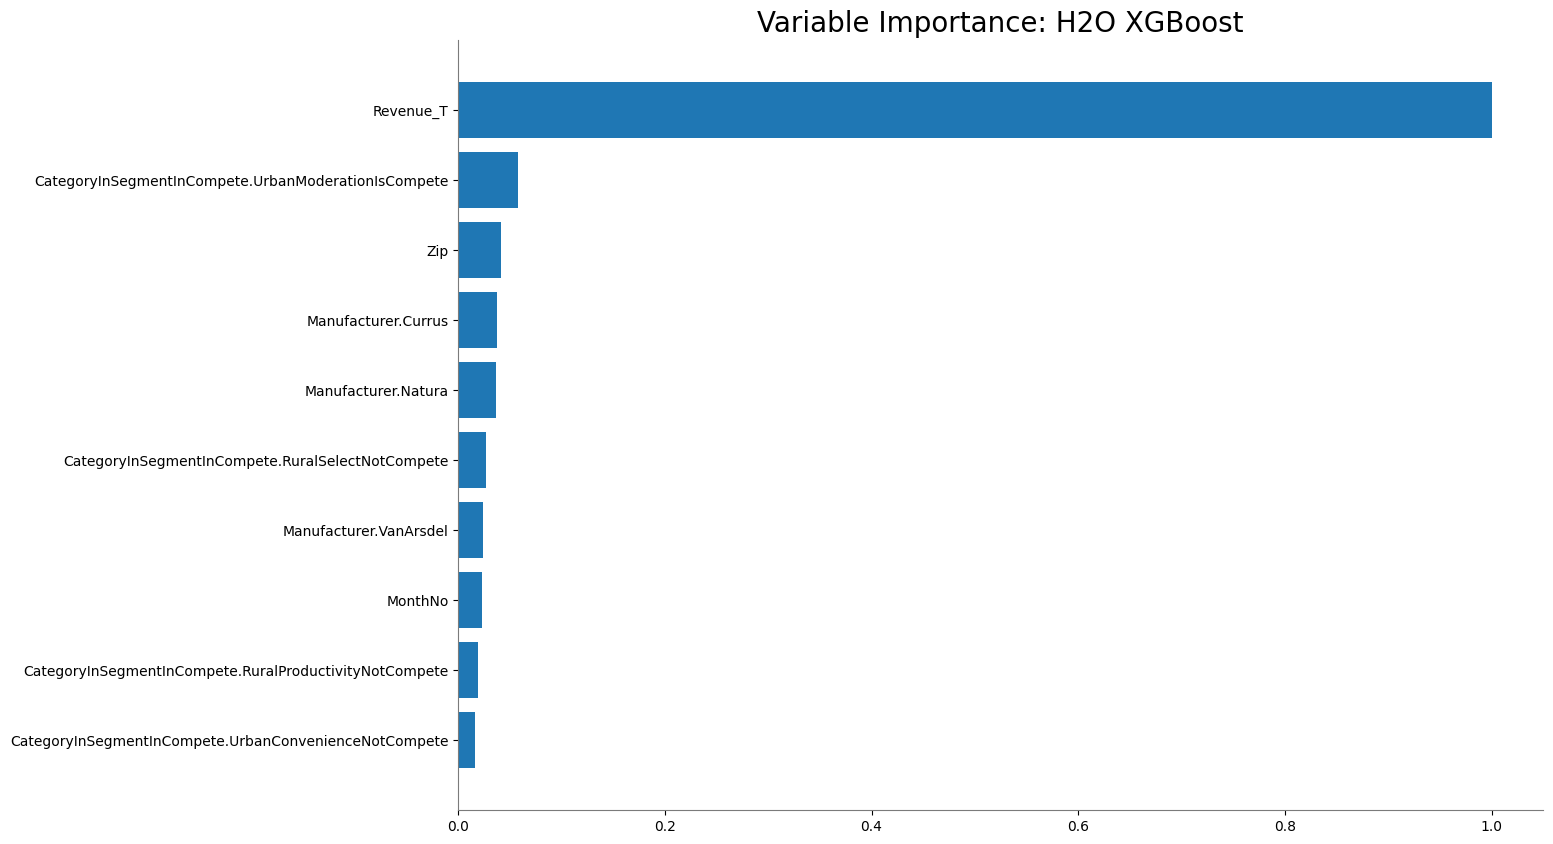

Model ID: GBM_3_AutoML_1_20230921_170620


<Figure size 640x480 with 0 Axes>

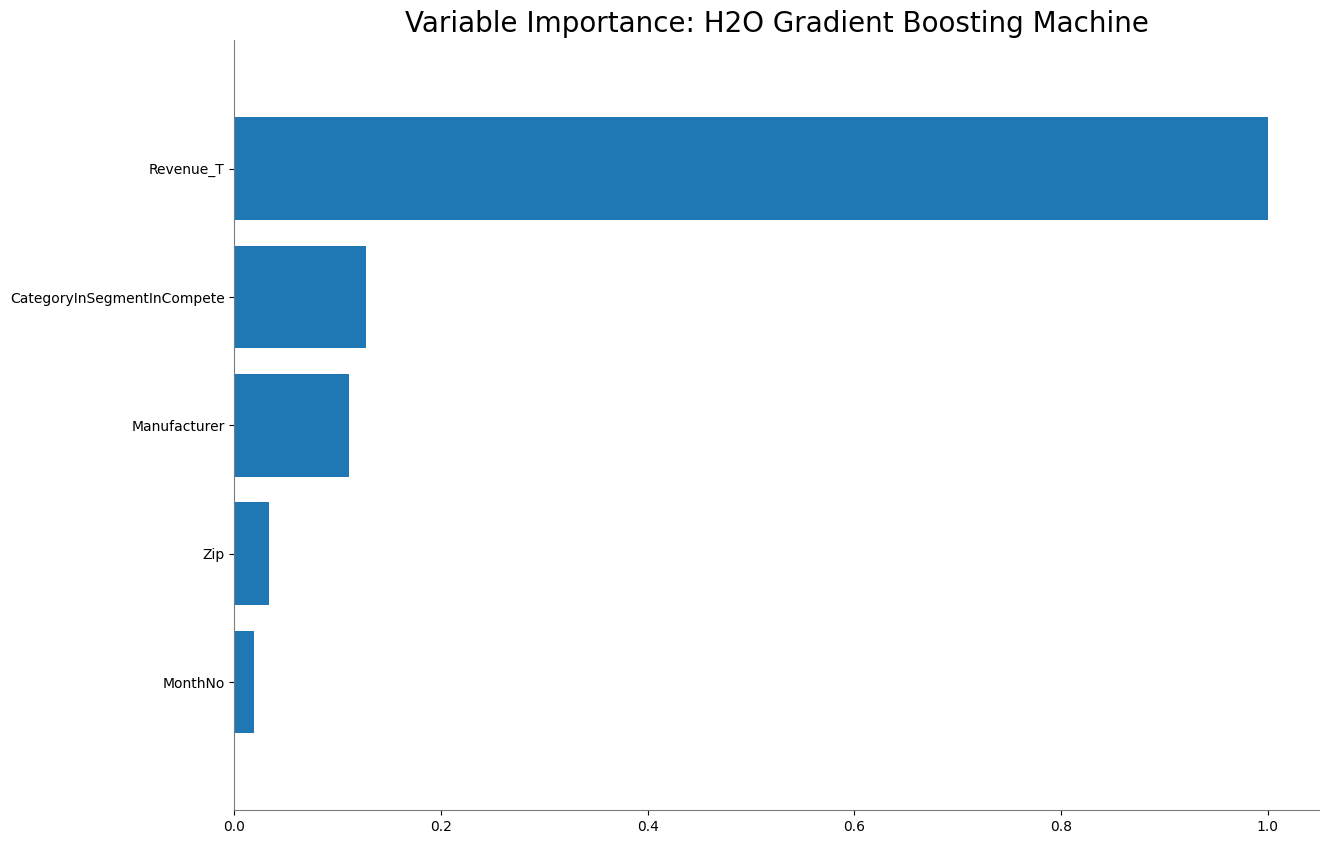

Model ID: GBM_2_AutoML_1_20230921_170620


<Figure size 640x480 with 0 Axes>

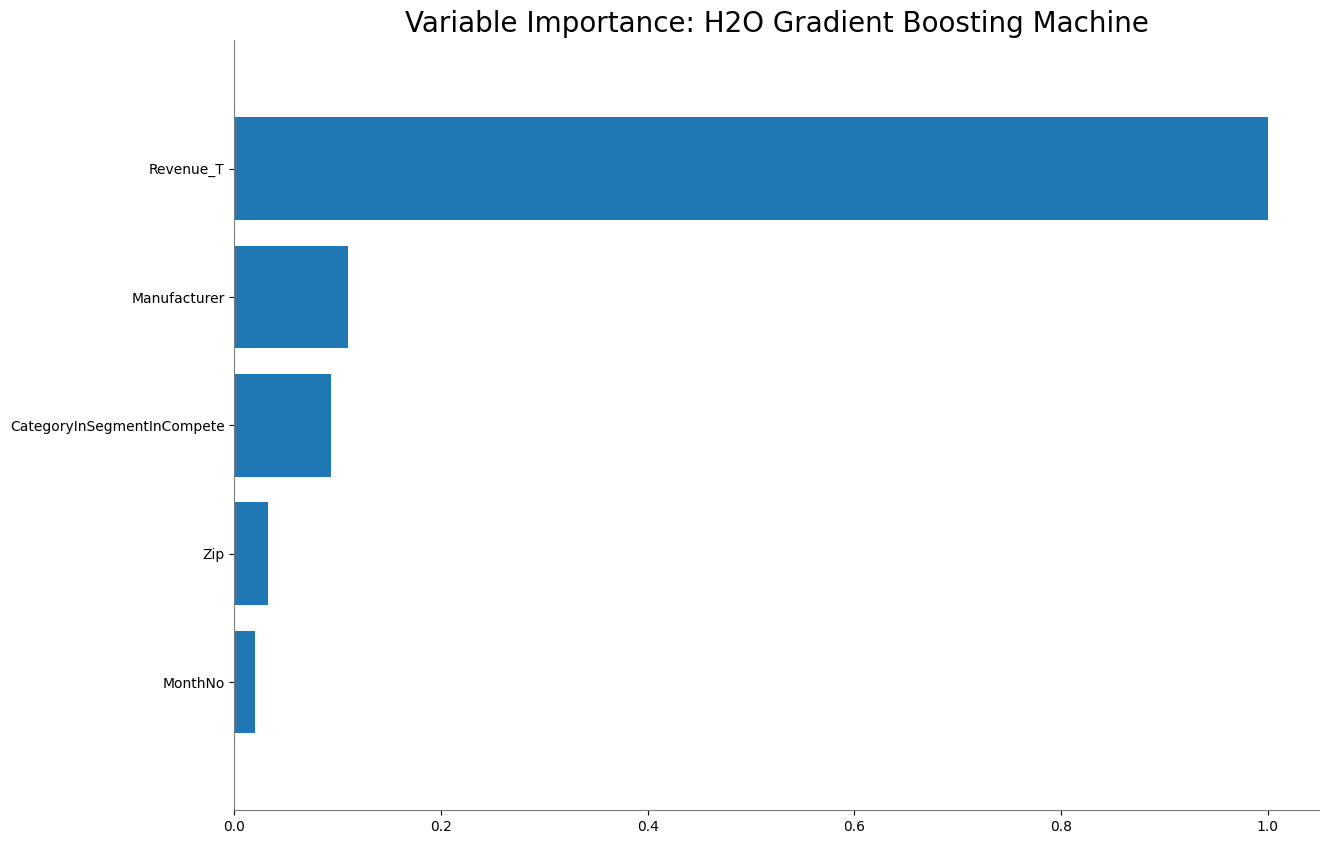

Model ID: GBM_1_AutoML_1_20230921_170620


<Figure size 640x480 with 0 Axes>

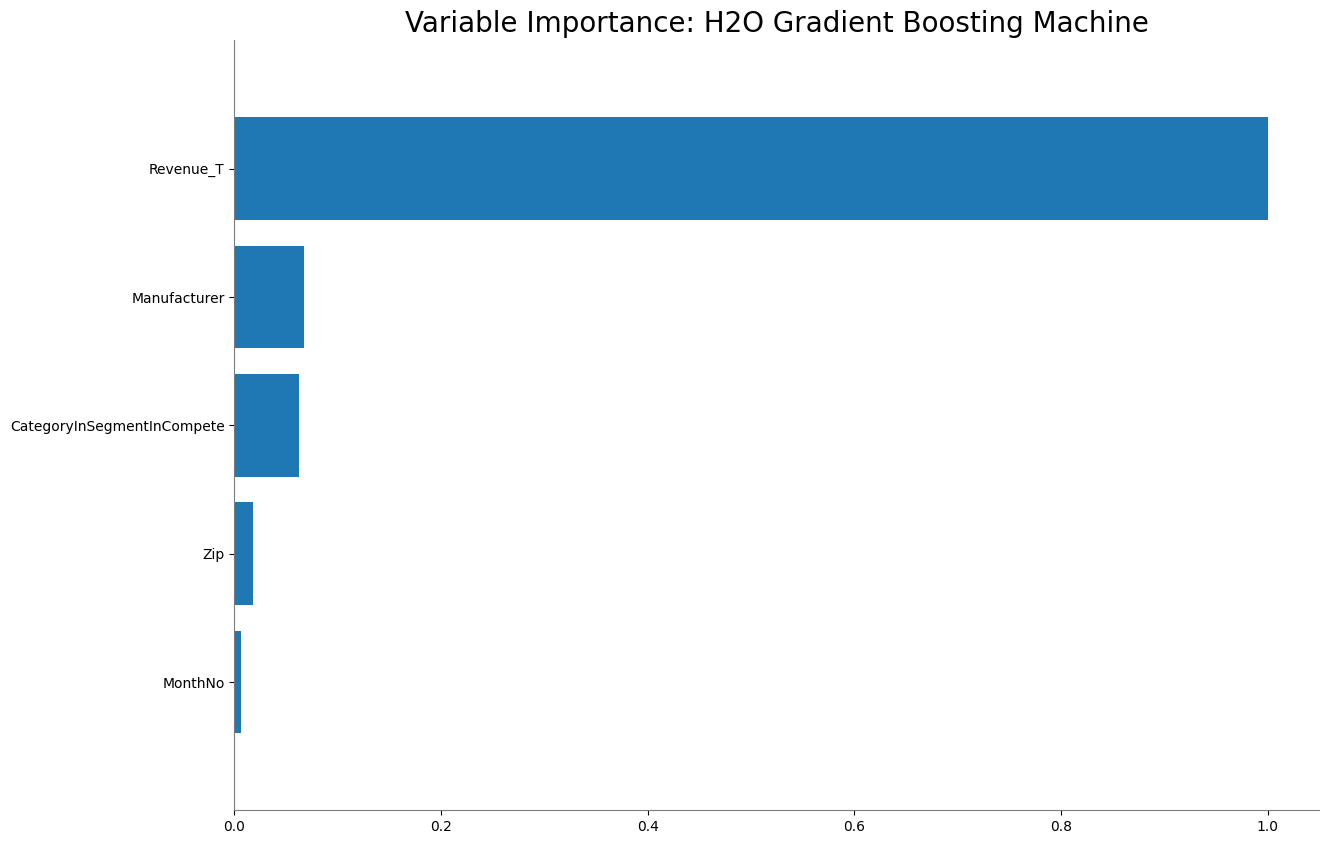

Model ID: DRF_1_AutoML_1_20230921_170620


<Figure size 640x480 with 0 Axes>

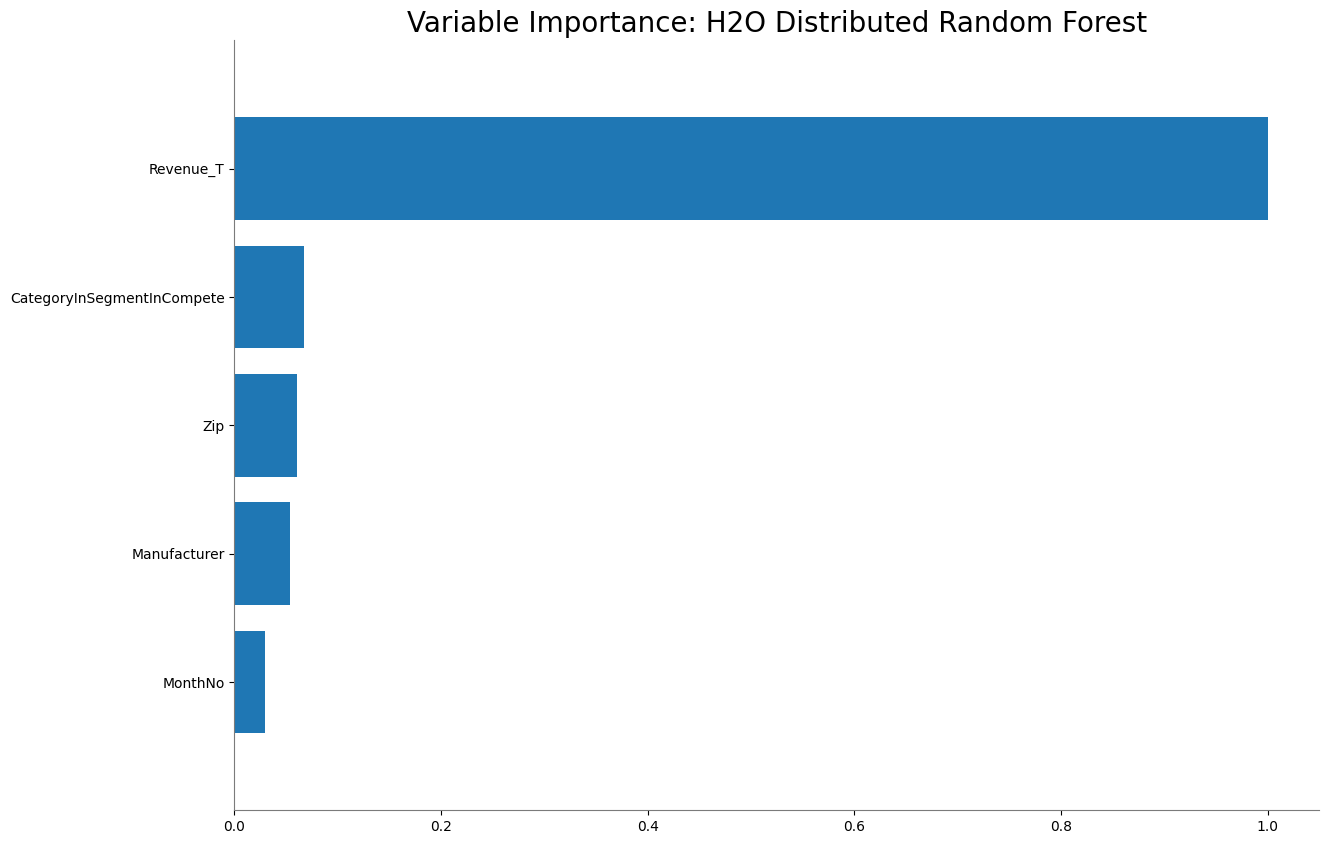

Model ID: XRT_1_AutoML_1_20230921_170620


<Figure size 640x480 with 0 Axes>

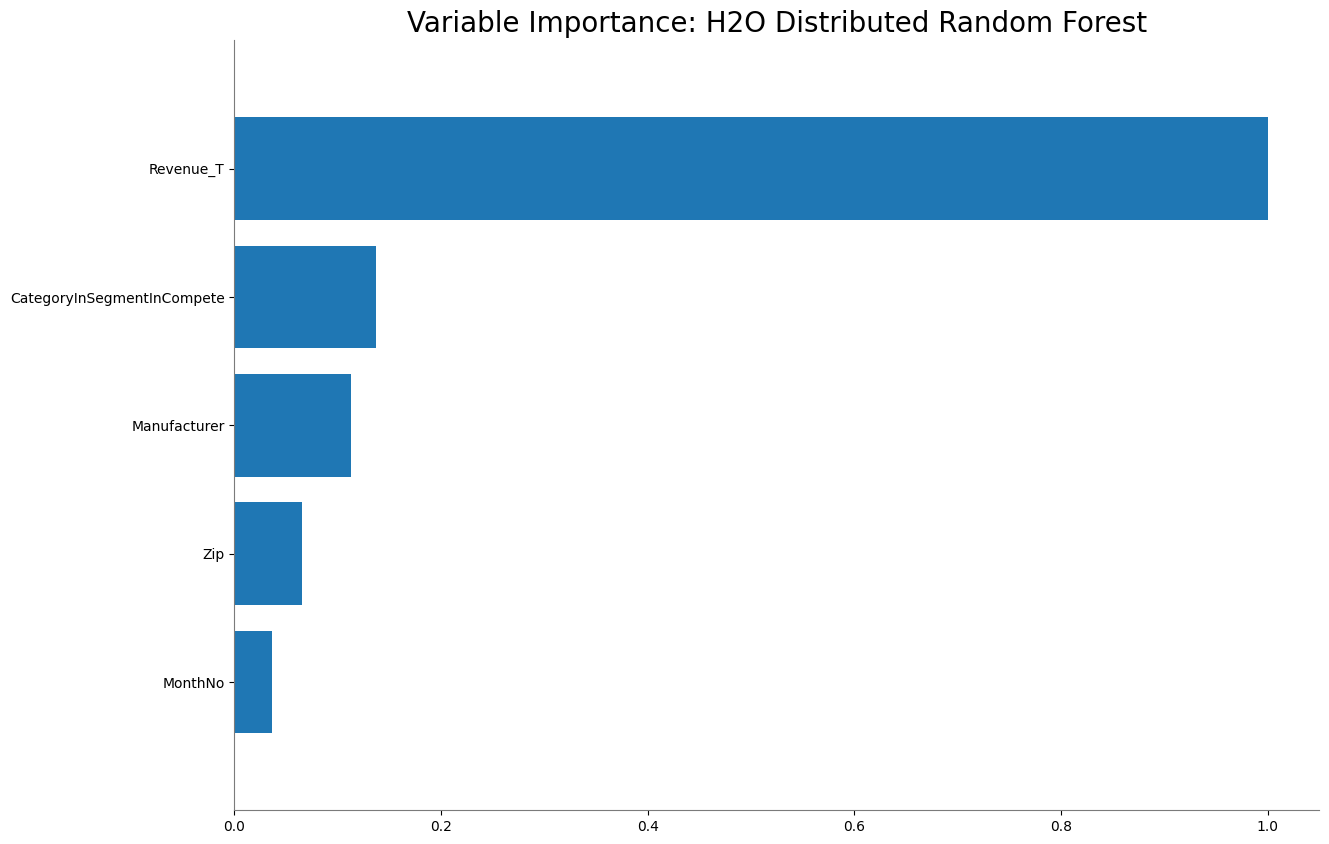

Model ID: GLM_1_AutoML_1_20230921_170620


<Figure size 640x480 with 0 Axes>

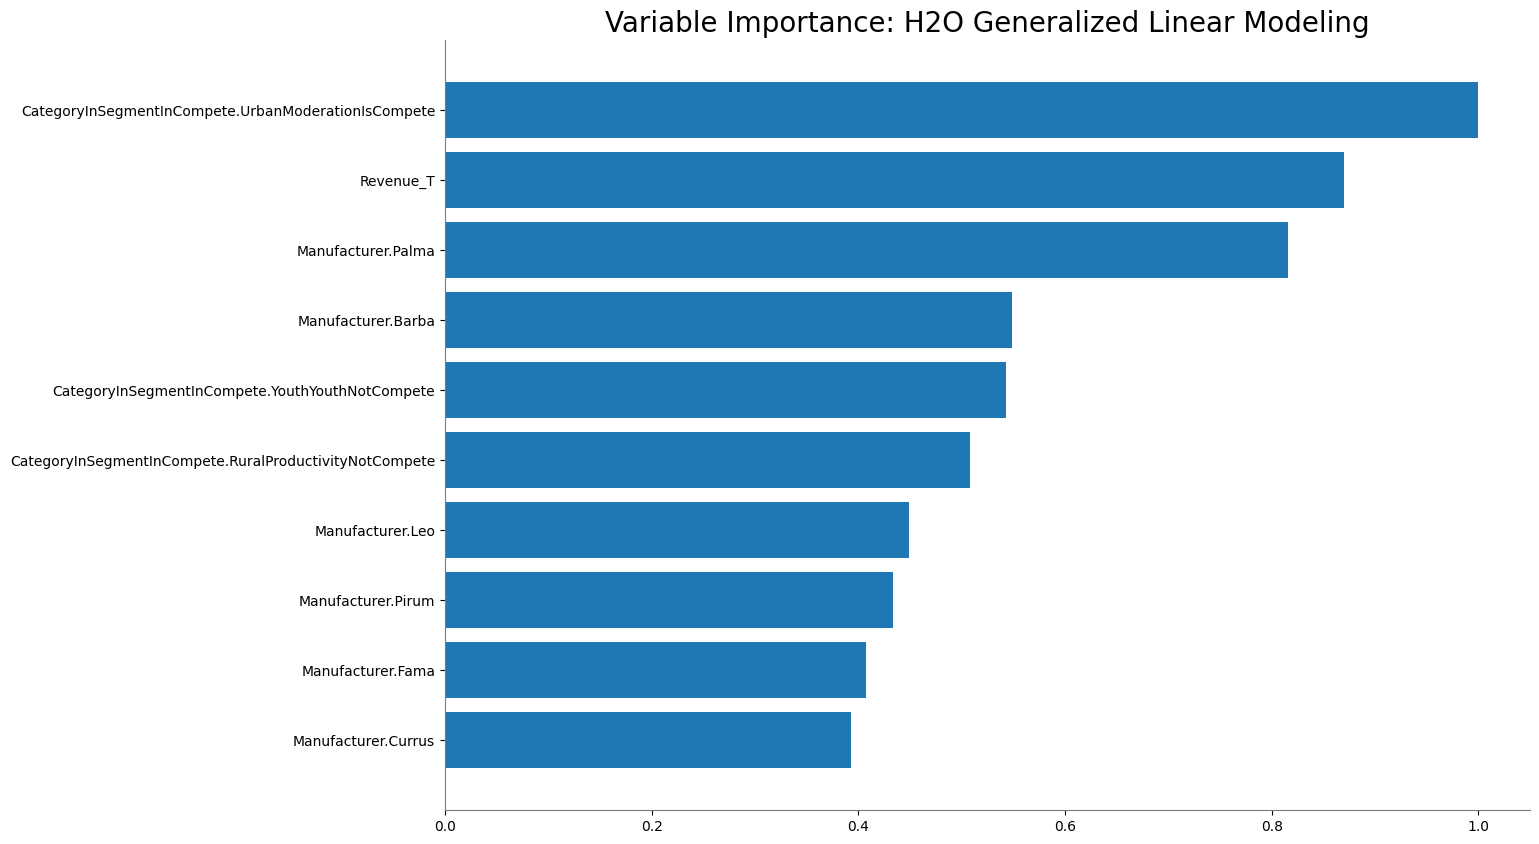

<Figure size 640x480 with 0 Axes>

In [15]:
for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    aml_unit.varimp_plot()
  except:
    print(f"{model_id} - ERROR PLOTTING") 

# Что с переобученносью

In [16]:
import pandas as pd
from sklearn.metrics import r2_score

for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    perf = aml_unit.model_performance(valid)
    print(perf)
    print(f"R2 cross validation: {aml_unit.r2()}")
    print(f"R2 test validation: {aml_unit.r2(valid=True)}")
    # прогноз лидирующей моделю на валидационной выборке
    val_pred=aml_unit.predict(unseen).as_data_frame()
    # из валидационного датасеат возбму столбец Stay и сконвертиую его в пандас датафрейм
    val_test = unseen['Units'].as_data_frame()
    r2_unseen = r2_score(val_test, val_pred)
    print(f"R2 unseen dataset validation: {r2_unseen}")
    print("-------------------\n-------------------")
  except:
    print(f"{model_id} - ERROR CALCULATE PERFOMANCE")

Model ID: StackedEnsemble_AllModels_1_AutoML_1_20230921_170620
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.026815241264392563
RMSE: 0.16375359924103214
MAE: 0.021027036865587195
RMSLE: 0.03329169403216833
Mean Residual Deviance: 0.026815241264392563
R^2: 0.7825894748148867
Null degrees of freedom: 131604
Residual degrees of freedom: 131598
Null deviance: 16232.227184866588
Residual deviance: 3529.019826600383
AIC: -102755.36875690892
R2 cross validation: 0.8548215992622815
R2 test validation: 0.7825894748148867
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
R2 unseen dataset validation: 0.7939157180023462
-------------------
-------------------
Model ID: StackedEnsemble_BestOfFamily_1_AutoML_1_20230921_170620
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.02648506808581803
RMSE: 0.16274233648875153
MAE: 0.021725374575202835
RMSLE: 0.03363244633679378
Mean Residual Devian

# Графии кривых обучения

StackedEnsemble_BestOfFamily_1_AutoML_1_20230921_170620 - ERROR PLOT


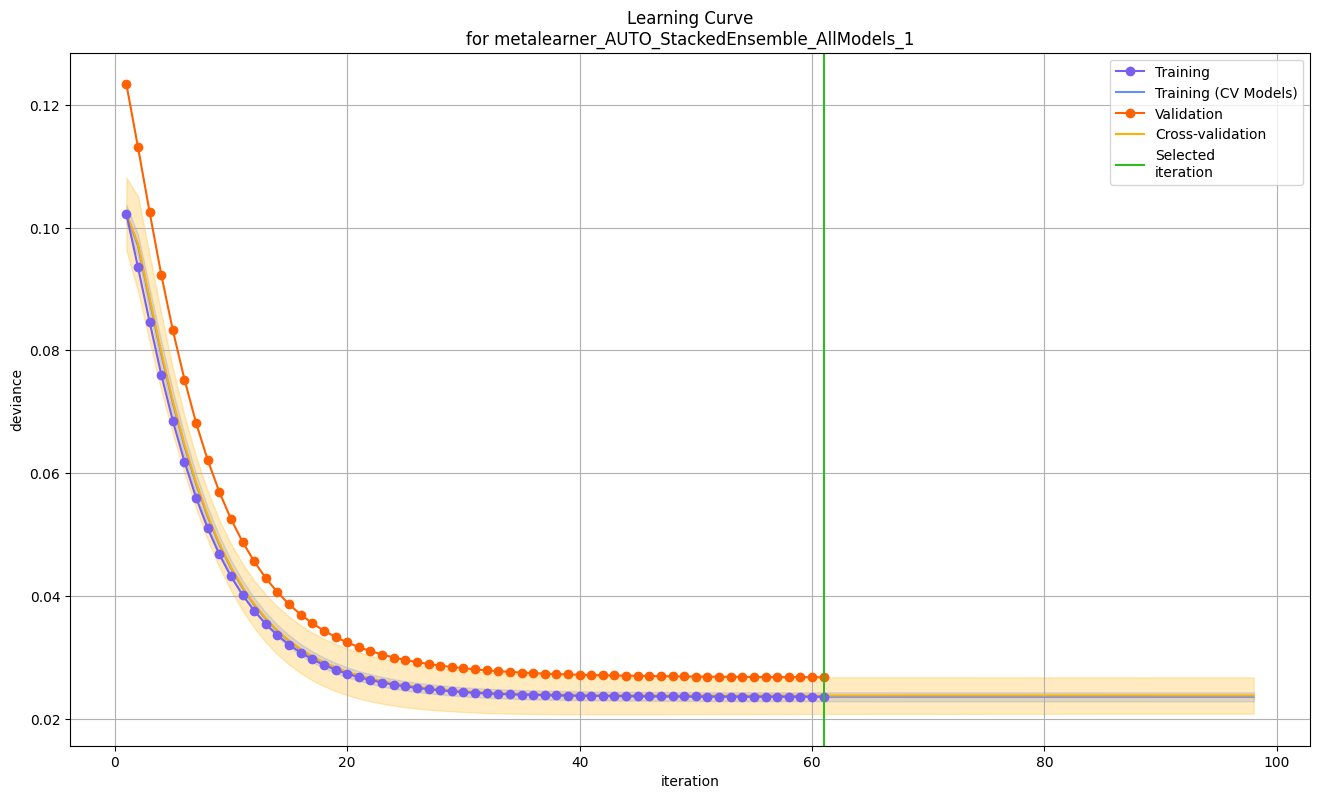

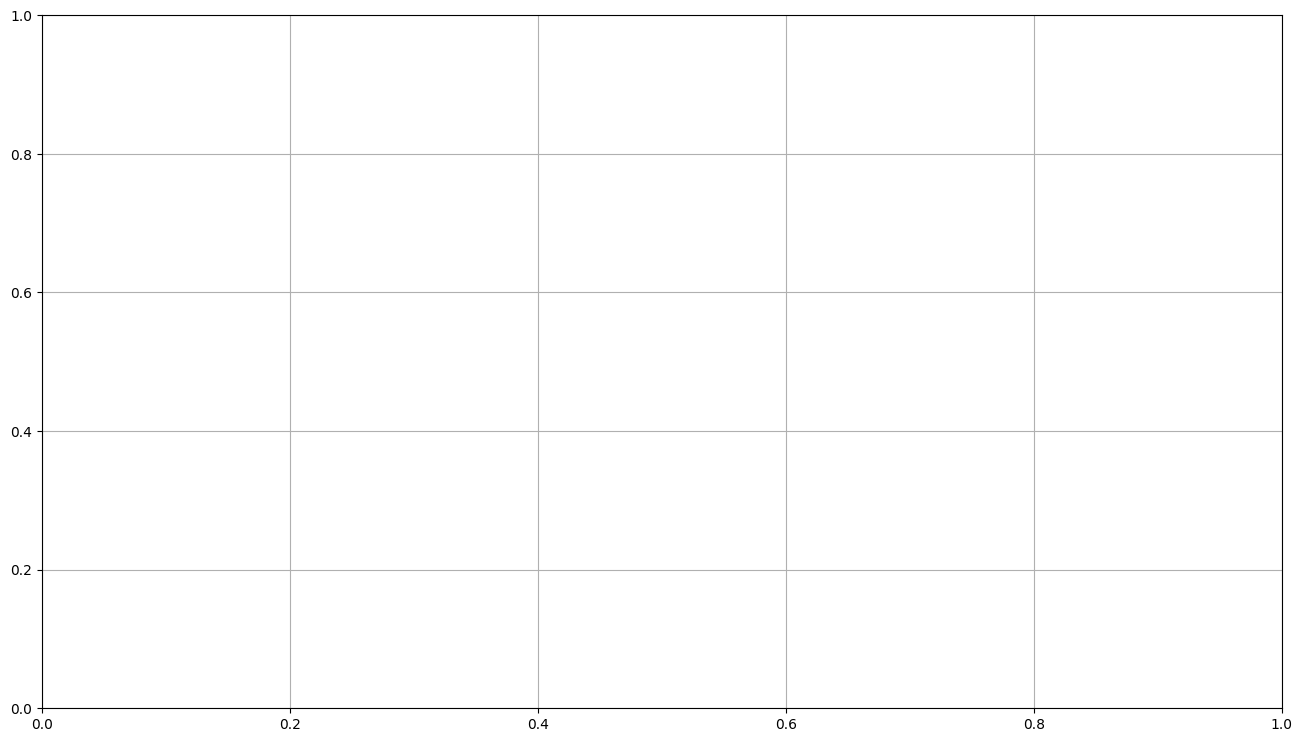

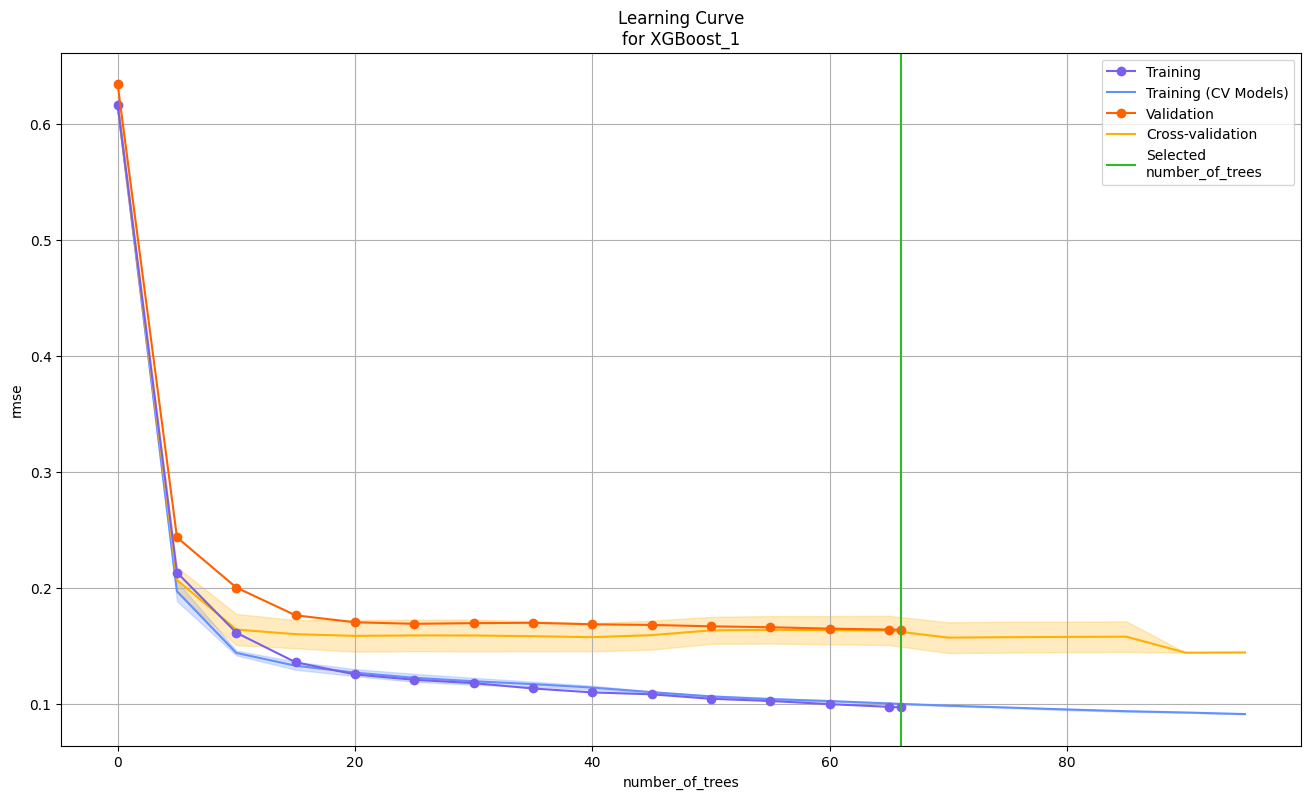

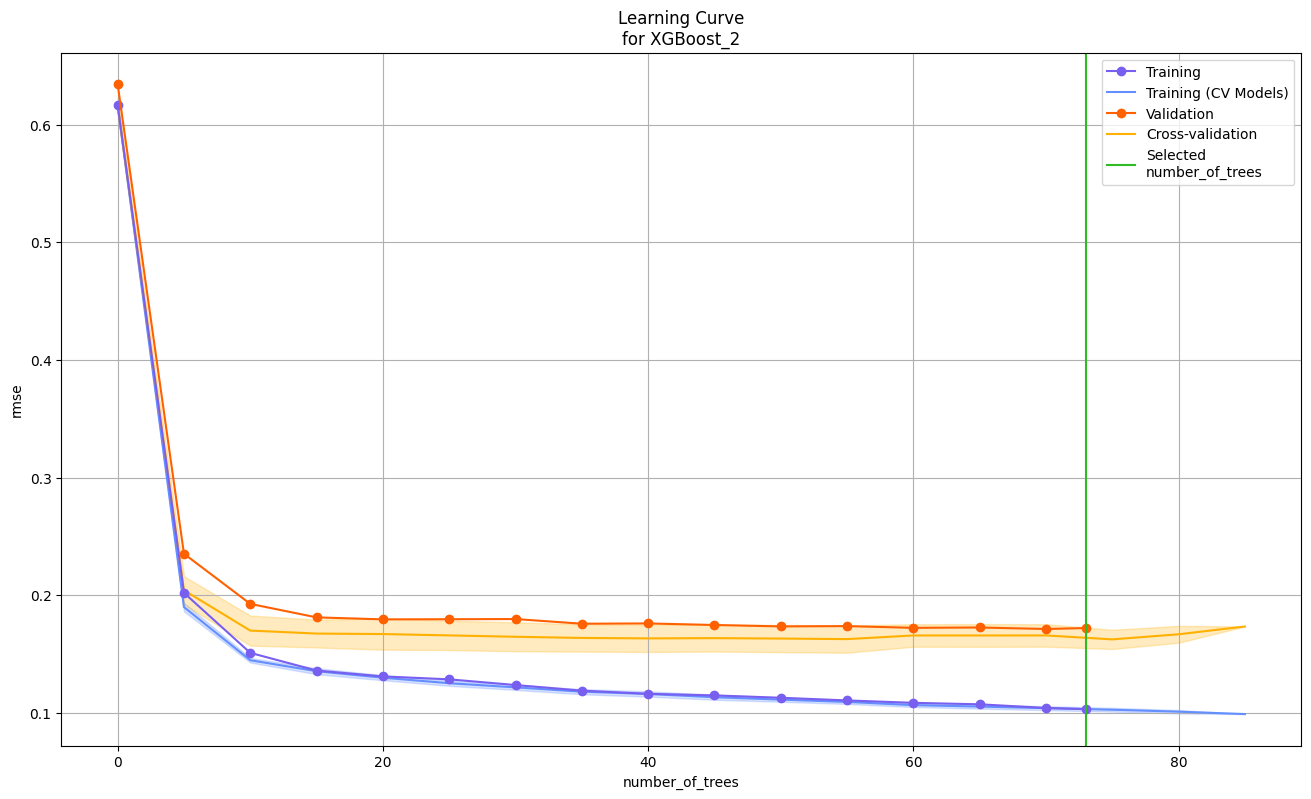

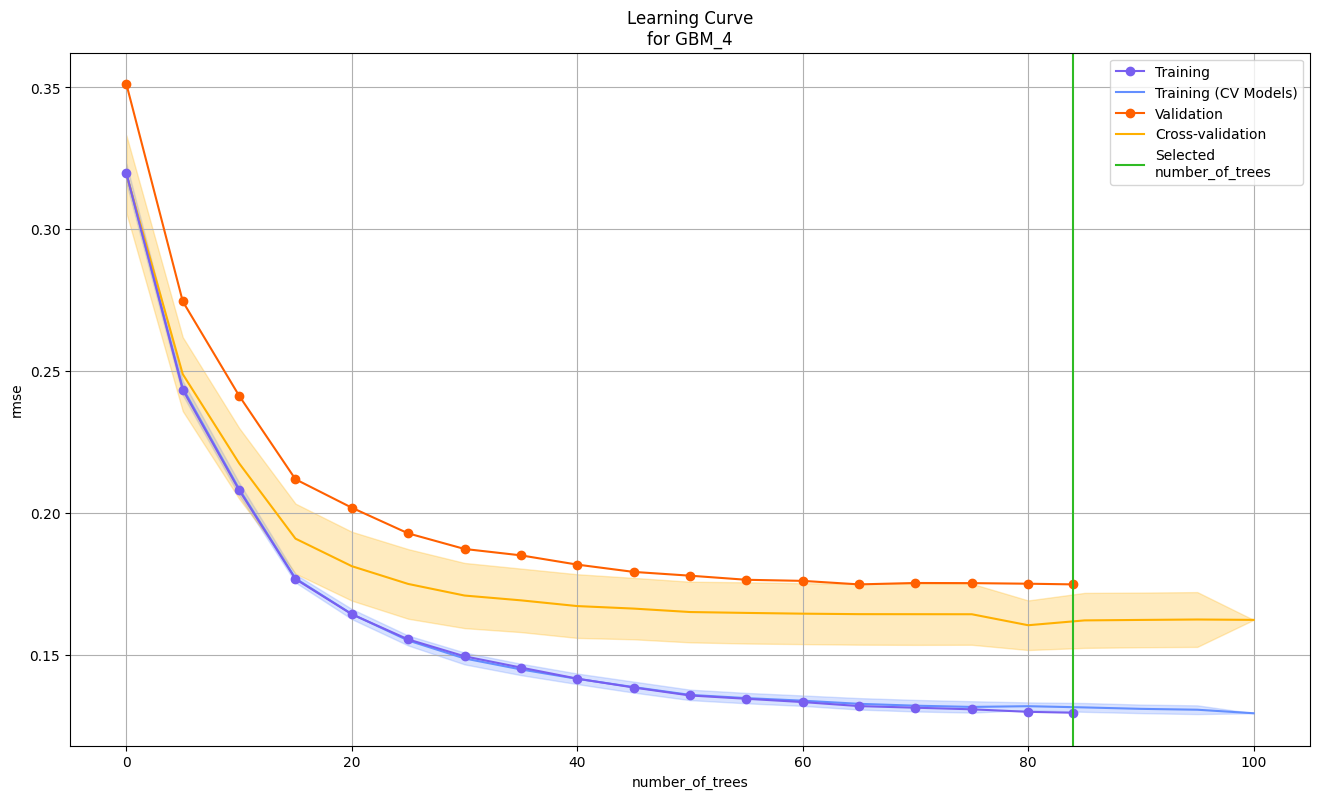

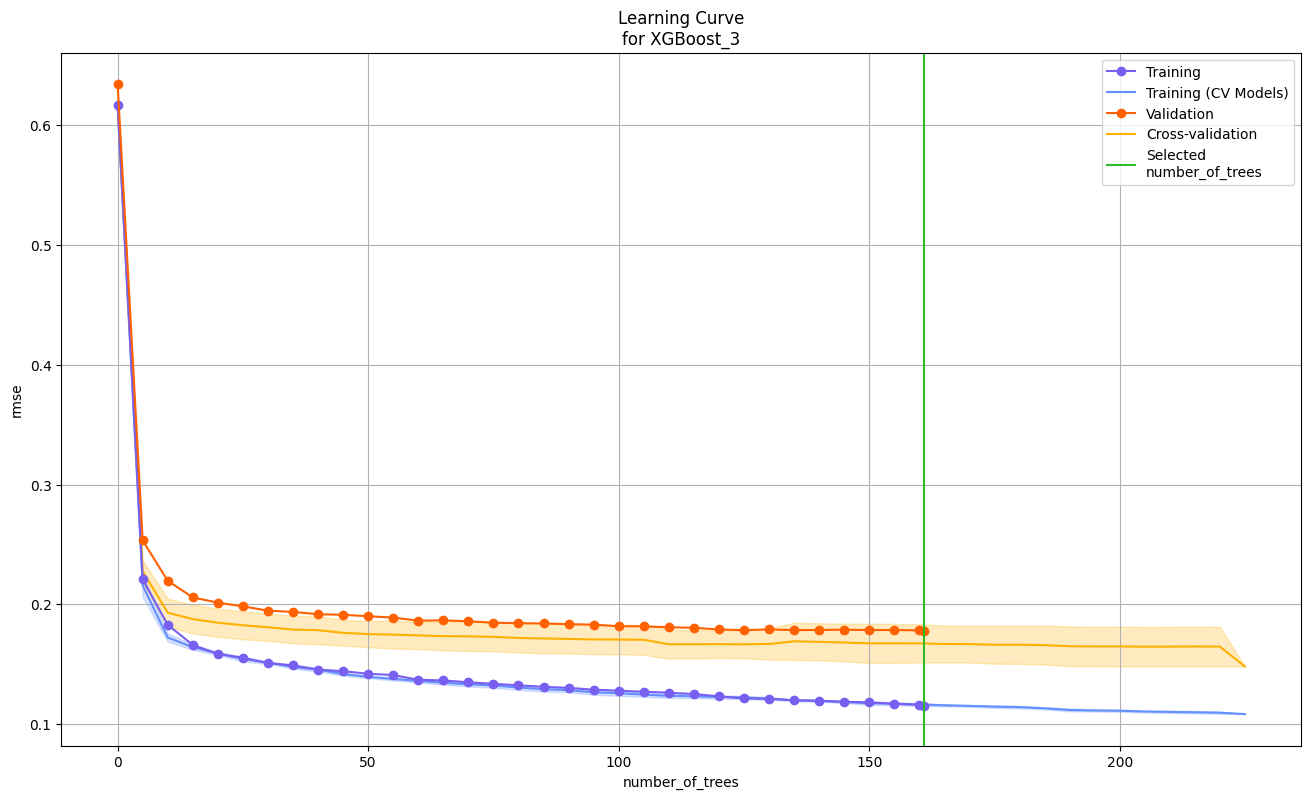

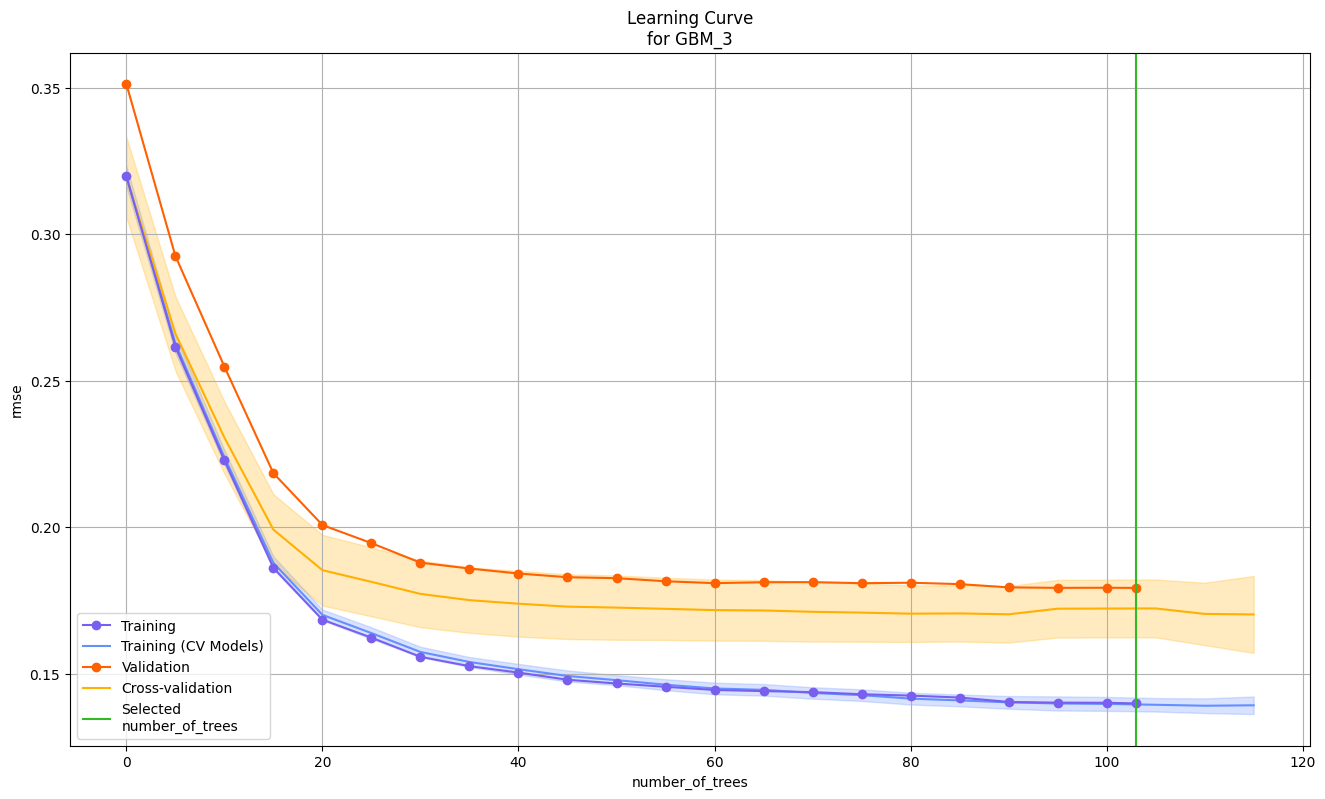

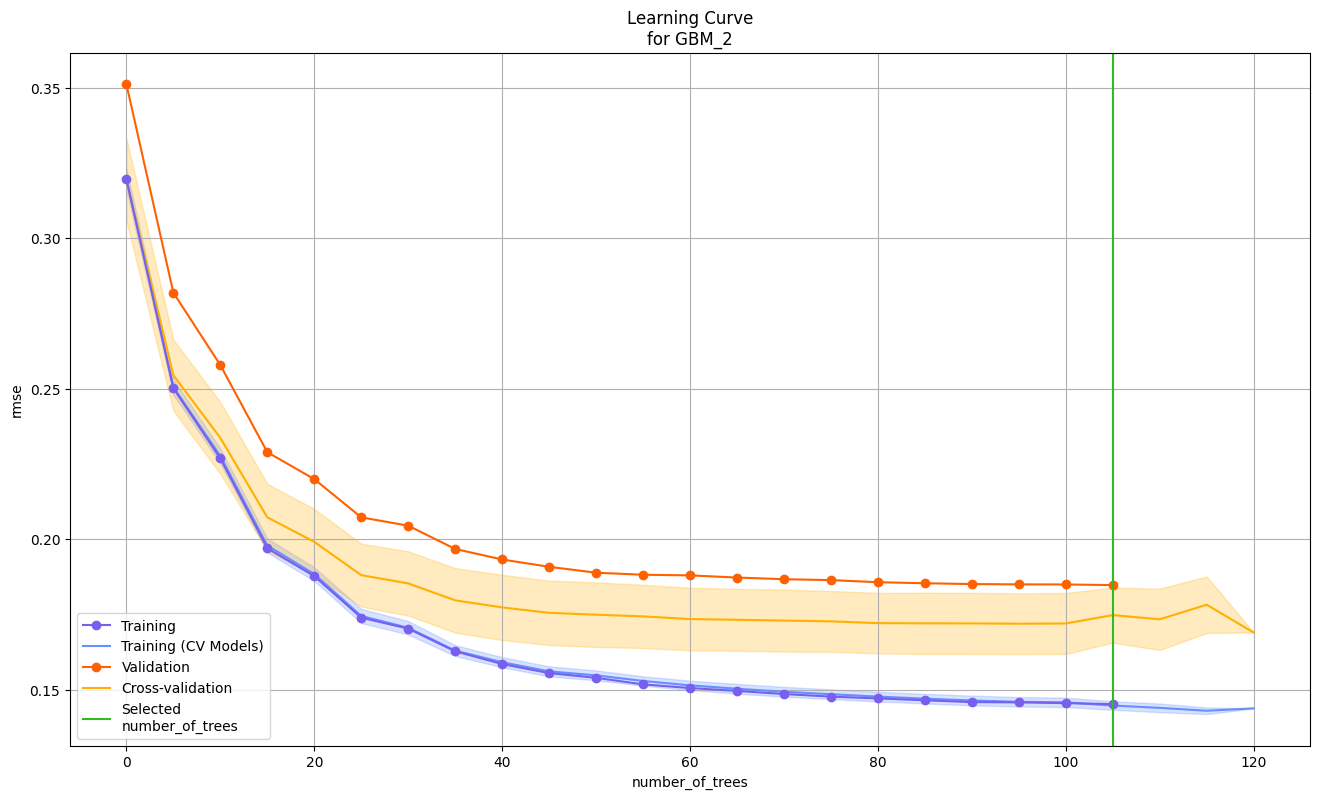

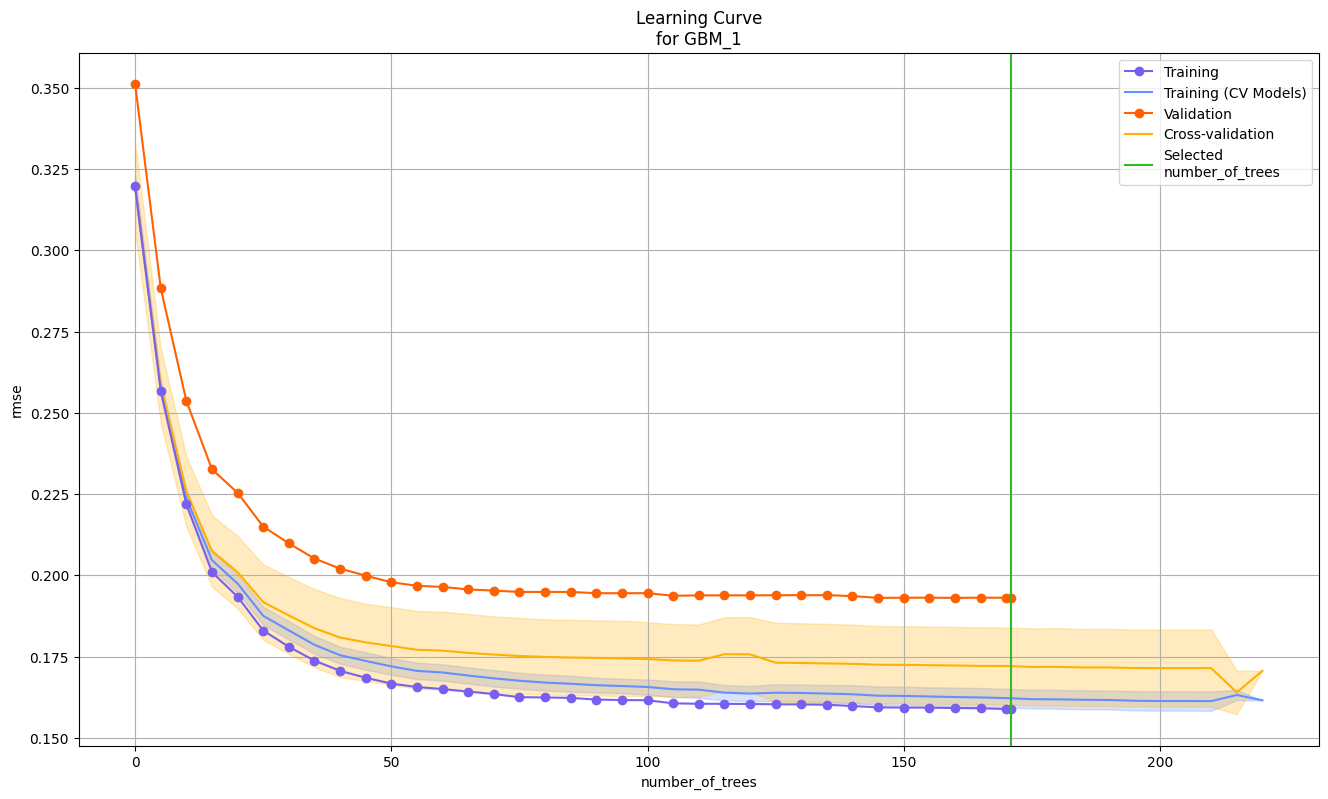

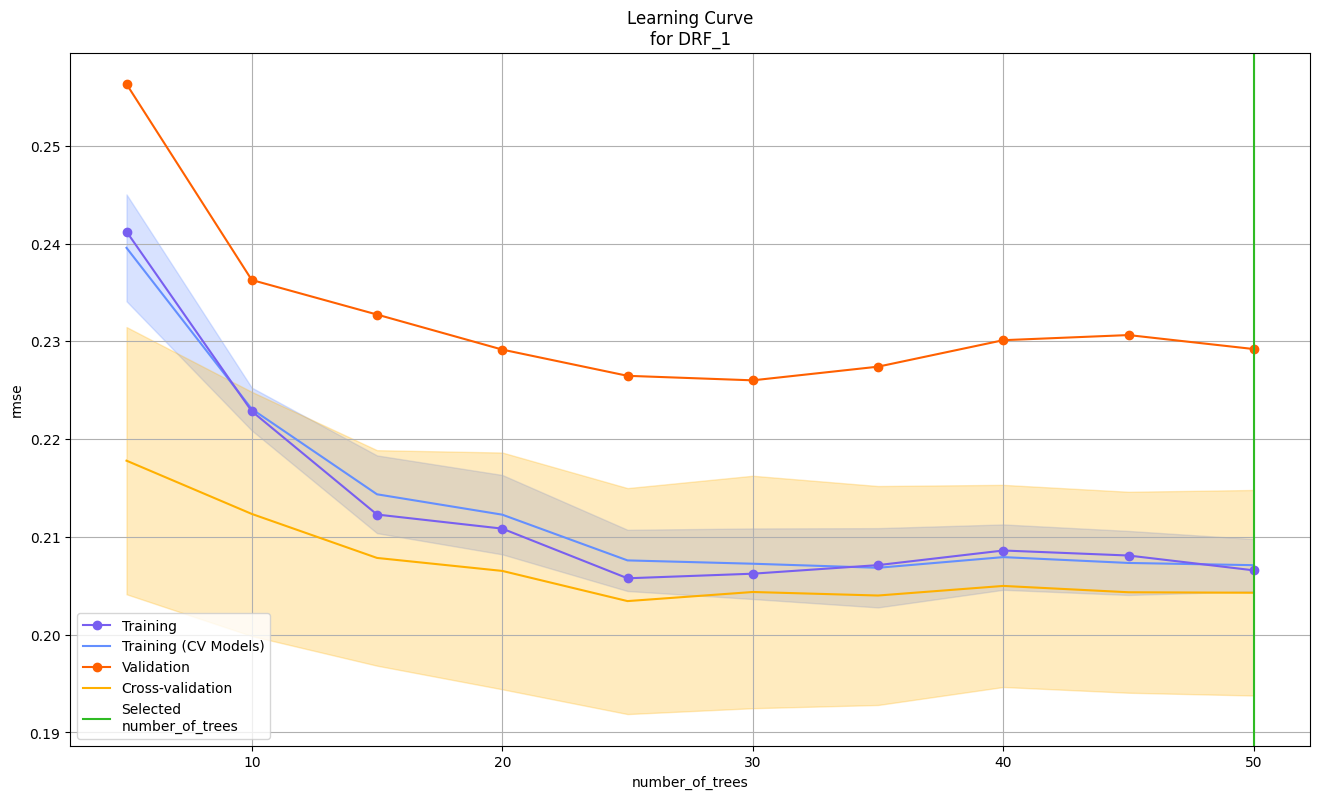

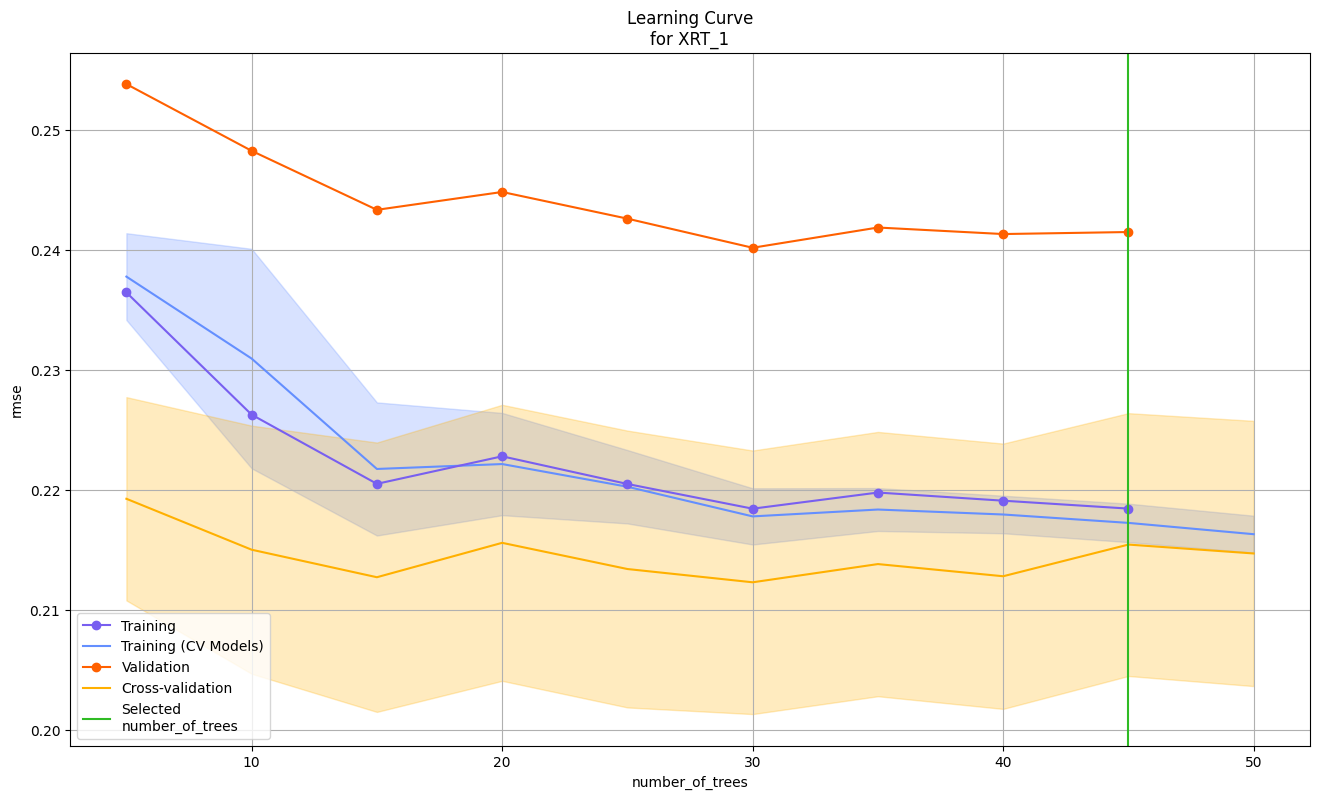

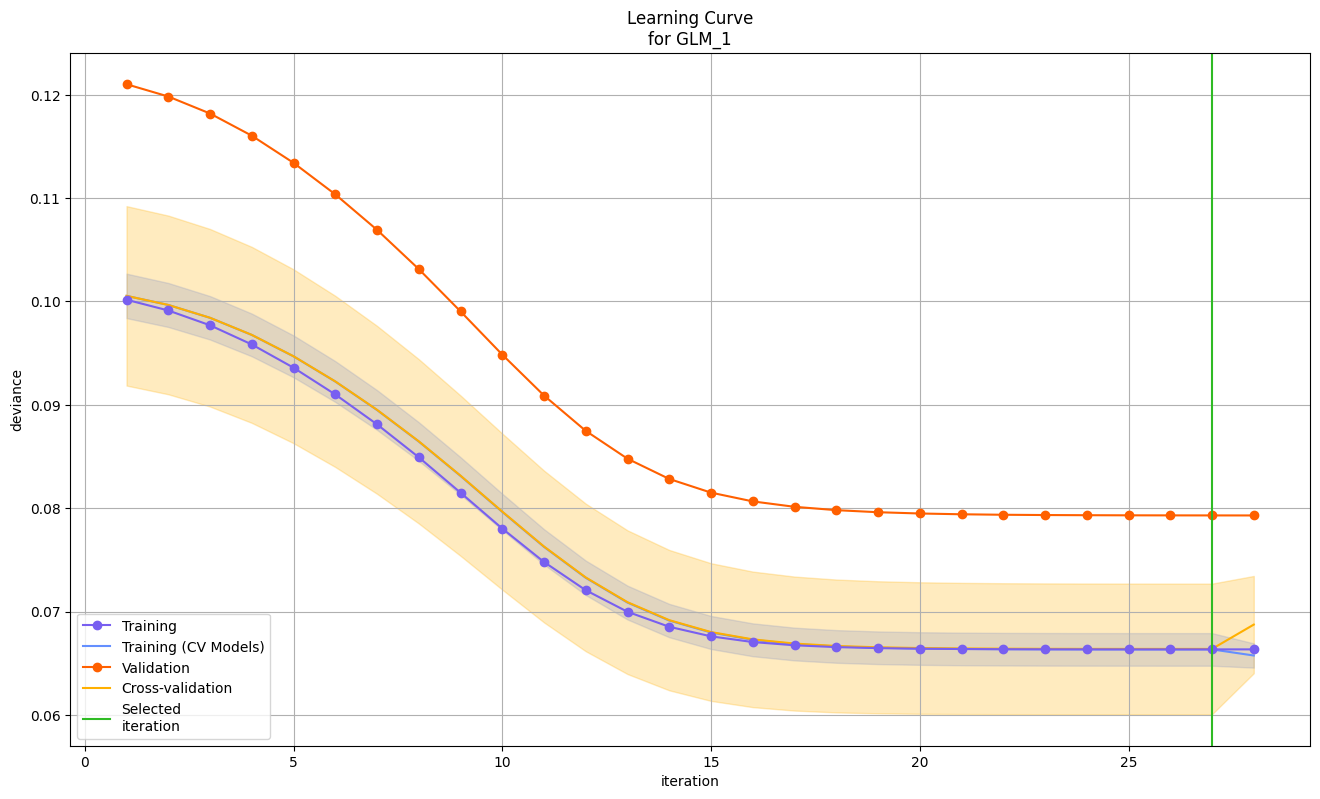

In [17]:
for model_id in model_ids:
  try:
    learning_curve_plot = h2o.get_model(model_id).learning_curve_plot()
  except:
    print(model_id, "- ERROR PLOT")

# Сохранение лучше модели

Довольно стаблильный показатель по Р-квадарт

In [18]:
#besy_model_id = 'StackedEnsemble_BestOfFamily_1_AutoML_4_20230921_114817'

In [19]:
# Сохранение лучшей модели
#besy_model = h2o.get_model(besy_model_id)
#h2o.save_model(besy_model, path = "./models")